單變數高斯：


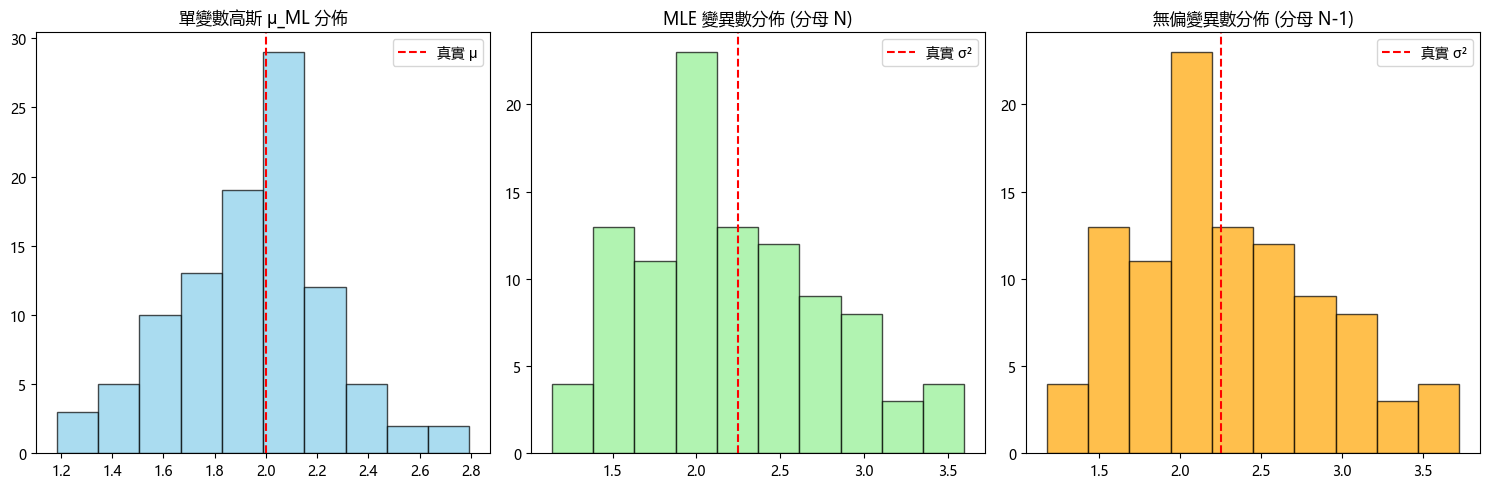

μ_ML 平均估計 = 1.951, 真實 μ = 2
σ²_ML 平均估計 = 2.221, 真實 σ² = 2.250
σ² 無偏估計 平均 = 2.298, 真實 σ² = 2.250

雙變數高斯：


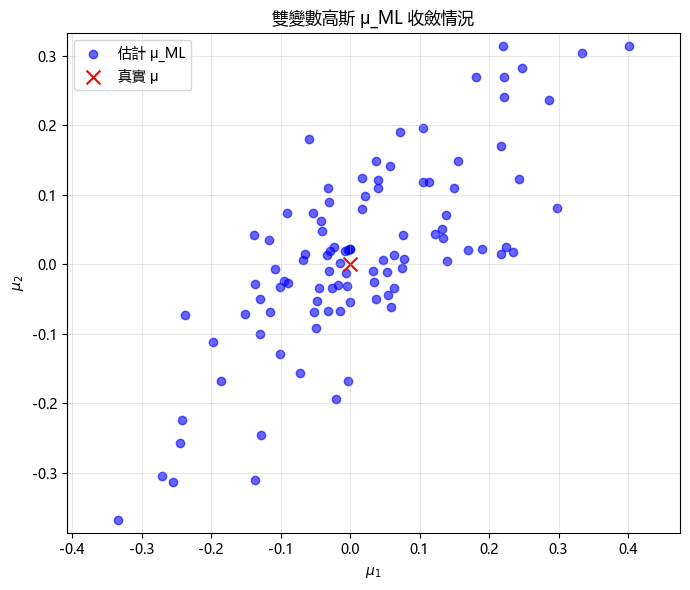

平均估計 μ = [0.01524758 0.01358333]
平均估計 Σ =
[[0.9833746  0.76863117]
 [0.76863117 0.96353569]]

多變數高斯：


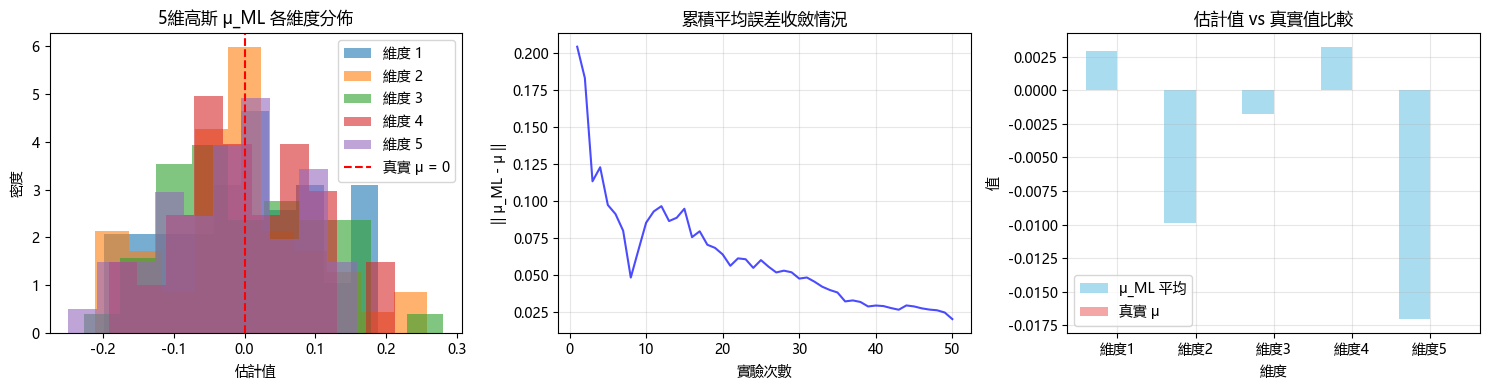

平均誤差 (|| μ_ML - μ ||) = 0.020
各維度平均估計 μ = [ 0.0029677  -0.00990849 -0.00175654  0.00325553 -0.01705247]
共變異數矩陣平均估計 Σ =
[[ 2.01123693 -0.01825601  0.0057406  -0.02202874 -0.01926236]
 [-0.01825601  2.02488199 -0.0224187  -0.03845228  0.02113077]
 [ 0.0057406  -0.0224187   2.02402709 -0.00424398  0.01863026]
 [-0.02202874 -0.03845228 -0.00424398  1.98173667  0.01666785]
 [-0.01926236  0.02113077  0.01863026  0.01666785  1.94556823]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 設定中文字體
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False


# ======================
# 單變數高斯分佈
# ======================
def univariate_demo(mu=0, sigma=1, n_samples=30, n_rounds=50):
    mu_estimates, sigma_mle_estimates, sigma_unbiased_estimates = [], [], []

    for _ in range(n_rounds):
        samples = np.random.normal(mu, sigma, n_samples)
        mu_ml = np.mean(samples)
        sigma_mle = np.var(samples, ddof=0)   # MLE (分母 N)
        sigma_unbiased = np.var(samples, ddof=1)  # 無偏估計 (分母 N-1)

        mu_estimates.append(mu_ml)
        sigma_mle_estimates.append(sigma_mle)
        sigma_unbiased_estimates.append(sigma_unbiased)

    # 畫圖
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.hist(mu_estimates, bins=10, alpha=0.7, color='skyblue', edgecolor='k')
    plt.axvline(mu, color='red', linestyle='--', label="真實 μ")
    plt.title("單變數高斯 μ_ML 分佈")
    plt.legend()

    plt.subplot(1,3,2)
    plt.hist(sigma_mle_estimates, bins=10, alpha=0.7, color='lightgreen', edgecolor='k')
    plt.axvline(sigma**2, color='red', linestyle='--', label="真實 σ²")
    plt.title("MLE 變異數分佈 (分母 N)")
    plt.legend()

    plt.subplot(1,3,3)
    plt.hist(sigma_unbiased_estimates, bins=10, alpha=0.7, color='orange', edgecolor='k')
    plt.axvline(sigma**2, color='red', linestyle='--', label="真實 σ²")
    plt.title("無偏變異數分佈 (分母 N-1)")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return (np.mean(mu_estimates), 
            np.mean(sigma_mle_estimates), 
            np.mean(sigma_unbiased_estimates))


# ======================
# 雙變數高斯分佈
# ======================
def bivariate_demo(n_samples=50, n_rounds=50):
    mu = np.array([0,0])
    Sigma = np.array([[1,0.8],[0.8,1]])  # 真實共變異數矩陣
    mu_estimates, Sigma_estimates = [], []

    for _ in range(n_rounds):
        samples = np.random.multivariate_normal(mu, Sigma, n_samples)
        mu_ml = np.mean(samples, axis=0)
        Sigma_ml = np.cov(samples.T, ddof=1)  # 無偏估計
        mu_estimates.append(mu_ml)
        Sigma_estimates.append(Sigma_ml)

    mu_estimates = np.array(mu_estimates)
    Sigma_estimates = np.array(Sigma_estimates)

    # 視覺化均值收斂
    plt.figure(figsize=(7,6))
    plt.scatter(mu_estimates[:,0], mu_estimates[:,1], alpha=0.6, color="blue", label="估計 μ_ML")
    plt.scatter(mu[0], mu[1], color="red", marker="x", s=100, label="真實 μ")
    plt.title("雙變數高斯 μ_ML 收斂情況")
    plt.xlabel(r"$\mu_1$")
    plt.ylabel(r"$\mu_2$")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


    return np.mean(mu_estimates, axis=0), np.mean(Sigma_estimates, axis=0)


# ======================
# 多變數高斯分佈
# ======================
def multivariate_demo(d=3, n_samples=100, n_rounds=50):
    mu = np.zeros(d)
    Sigma = np.eye(d) * 2
    mu_estimates, Sigma_estimates = [], []

    for _ in range(n_rounds):
        samples = np.random.multivariate_normal(mu, Sigma, n_samples)
        mu_ml = np.mean(samples, axis=0)
        Sigma_ml = np.cov(samples.T, ddof=1)
        mu_estimates.append(mu_ml)
        Sigma_estimates.append(Sigma_ml)

    mu_estimates = np.array(mu_estimates)
    Sigma_estimates = np.array(Sigma_estimates)
    
    # 視覺化 μ 收斂
    plt.figure(figsize=(15, 4))
    
    # 子圖1：各維度分布
    plt.subplot(1, 3, 1)
    for i in range(min(d, 5)):
        plt.hist(mu_estimates[:, i], bins=10, alpha=0.6, 
                label=f'維度 {i+1}', density=True)
    plt.axvline(0, color='red', linestyle='--', label='真實 μ = 0')
    plt.title(f'{d}維高斯 μ_ML 各維度分佈')
    plt.xlabel('估計值')
    plt.ylabel('密度')
    plt.legend()

    # 子圖2：誤差收斂
    plt.subplot(1, 3, 2)
    cumulative_mean = np.cumsum(mu_estimates, axis=0) / np.arange(1, n_rounds+1).reshape(-1, 1)
    errors = np.linalg.norm(cumulative_mean - mu, axis=1)
    plt.plot(range(1, n_rounds+1), errors, 'b-', alpha=0.7)
    plt.title('累積平均誤差收斂情況')
    plt.xlabel('實驗次數')
    plt.ylabel('|| μ_ML - μ ||')
    plt.grid(True, alpha=0.3)

    # 子圖3：最終估計 vs 真實
    plt.subplot(1, 3, 3)
    final_estimates = np.mean(mu_estimates, axis=0)
    dims_to_show = min(d, 8)
    x_pos = np.arange(dims_to_show)
    plt.bar(x_pos - 0.2, final_estimates[:dims_to_show], 0.4, label='μ_ML 平均', alpha=0.7, color='skyblue')
    plt.bar(x_pos + 0.2, mu[:dims_to_show], 0.4, label='真實 μ', alpha=0.7, color='lightcoral')
    plt.xlabel('維度')
    plt.ylabel('值')
    plt.title('估計值 vs 真實值比較')
    plt.xticks(x_pos, [f'維度{i+1}' for i in range(dims_to_show)])
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    mean_error = np.linalg.norm(np.mean(mu_estimates, axis=0) - mu)
    return mean_error, np.mean(mu_estimates, axis=0), np.mean(Sigma_estimates, axis=0)


# ======================
# 主程式
# ======================
if __name__ == "__main__":
    print("單變數高斯：")
    mu_avg, sigma_mle_avg, sigma_unbiased_avg = univariate_demo(mu=2, sigma=1.5, n_samples=30, n_rounds=100)
    print(f"μ_ML 平均估計 = {mu_avg:.3f}, 真實 μ = 2")
    print(f"σ²_ML 平均估計 = {sigma_mle_avg:.3f}, 真實 σ² = {1.5**2:.3f}")
    print(f"σ² 無偏估計 平均 = {sigma_unbiased_avg:.3f}, 真實 σ² = {1.5**2:.3f}")

    print("\n雙變數高斯：")
    mu_avg_bi, Sigma_avg_bi = bivariate_demo(n_samples=50, n_rounds=100)
    print(f"平均估計 μ = {mu_avg_bi}")
    print(f"平均估計 Σ =\n{Sigma_avg_bi}")

    print("\n多變數高斯：")
    err_multi, mu_avg_multi, Sigma_avg_multi = multivariate_demo(d=5, n_samples=200, n_rounds=50)
    print(f"平均誤差 (|| μ_ML - μ ||) = {err_multi:.3f}")
    print(f"各維度平均估計 μ = {mu_avg_multi}")
    print(f"共變異數矩陣平均估計 Σ =\n{Sigma_avg_multi}")
